In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

sns.set_style("whitegrid")
CONTEXT="paper"
sns.set_context(CONTEXT)

In [96]:
def perform_df_mapping(df):
    df = df.rename(columns={
        "model_name": "Model",
        "feature_set": "Data",
        "pr_auc": "Readm (PR-AUC)",
        "seq_len": "Sequence Length",
        "n_heads": "Num Attention Heads",
        "n_layers": "Num MaskEnc Layers"
    })
    df['Data'] = df['Data'].map({
        "dxtx": "Dx&Tx",
        "dx": "Dx"
    })
    df['Model'] = df['Model'].map({
        'bitenet': 'BiteNet',
        'rnn': 'RNN',
        'brnn': 'BRNN',
        'retain': 'RETAIN',
        'deepr': 'Deepr'
    })
    return df

In [97]:
df = pd.read_csv("./results/baseline_comparison.csv")
df = perform_df_mapping(df)
display(df)

,Model,Data,Sequence Length,trial,Readm (PR-AUC),precision@5,precision@10,precision@15,precision@20,precision@25,precision@30
0,BiteNet,Dx&Tx,6,1,0.336246,0.360089,0.229216,0.185870,0.175496,0.173372,0.172986
1,BiteNet,Dx,6,1,0.356011,0.354356,0.231733,0.187129,0.176139,0.173833,0.173432
2,RNN,Dx&Tx,6,1,0.370498,0.312022,0.190712,0.154687,0.146369,0.144686,0.144369
3,RNN,Dx,6,1,0.365696,0.338178,0.213149,0.174150,0.164951,0.163205,0.162883
4,BRNN,Dx&Tx,6,1,0.407296,0.328400,0.201754,0.164658,0.156453,0.154828,0.154535
...,...,...,...,...,...,...,...,...,...,...,...
595,BRNN,Dx,16,10,0.345988,0.306378,0.182999,0.147717,0.138670,0.136707,0.136246
596,RETAIN,Dx&Tx,16,10,0.322365,0.411600,0.270650,0.219669,0.205147,0.201708,0.201078
597,RETAIN,Dx,16,10,0.336884,0.400356,0.263322,0.216178,0.202479,0.199025,0.198208
598,Deepr,Dx&Tx,16,10,0.343574,0.415622,0.270624,0.222064,0.208349,0.204921,0.204194


In [98]:
grouped_df = df.groupby(by=["Model", "Data"]).mean().drop(columns=[ "Sequence Length", "trial"]).round(3).sort_values(by=['Data', 'Model'])
grouped_df.to_csv("scratch.csv")
display(grouped_df)

,,Readm (PR-AUC),precision@5,precision@10,precision@15,precision@20,precision@25,precision@30
Model,Data,,,,,,,
BRNN,Dx,0.374,0.327,0.200,0.162,0.153,0.150,0.150
BiteNet,Dx,0.350,0.351,0.223,0.180,0.169,0.167,0.166
Deepr,Dx,0.347,0.435,0.288,0.237,0.223,0.220,0.220
RETAIN,Dx,0.346,0.412,0.270,0.221,0.208,0.205,0.204
RNN,Dx,0.366,0.324,0.198,0.160,0.151,0.149,0.148
BRNN,Dx&Tx,0.372,0.316,0.193,0.156,0.147,0.145,0.145
BiteNet,Dx&Tx,0.357,0.336,0.215,0.173,0.162,0.160,0.160
Deepr,Dx&Tx,0.359,0.435,0.288,0.238,0.224,0.221,0.220
RETAIN,Dx&Tx,0.342,0.409,0.269,0.220,0.207,0.204,0.203


,Model,Data,Sequence Length,precision@20
0,BRNN,Dx,6,0.154088
1,BRNN,Dx,8,0.146473
2,BRNN,Dx,10,0.156419
3,BRNN,Dx,12,0.151298
4,BRNN,Dx,14,0.147344


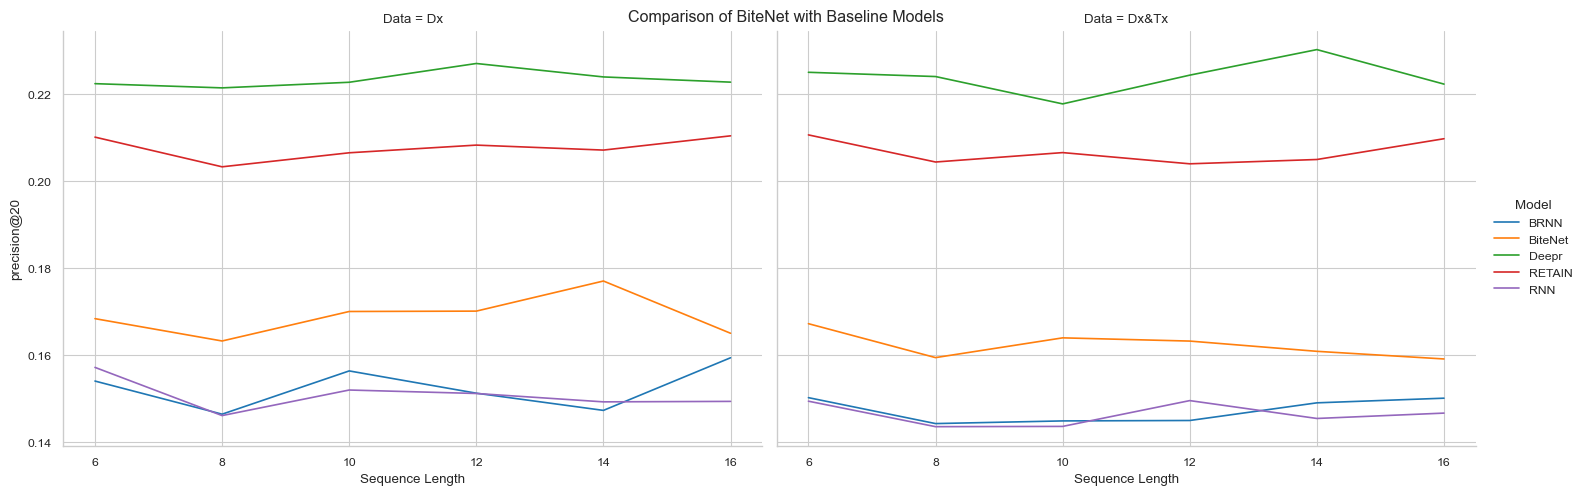

In [99]:
robustness_comp_df = df[['Model', 'Data', 'Sequence Length', 'precision@20']]
robustness_comp_df = robustness_comp_df.groupby(by=['Model', 'Data', 'Sequence Length']).mean().reset_index()
display(robustness_comp_df.head())

g = sns.relplot(
    data=robustness_comp_df,
    x='Sequence Length',
    y='precision@20',
    col='Data',
    hue='Model',
    kind='line',
    aspect=1.5
)
g.fig.suptitle('Comparison of BiteNet with Baseline Models')

plt.savefig(f"./results/baseline_comparison_{CONTEXT}.png", dpi=600)

,Model,Data,Num MaskEnc Layers,Readm (PR-AUC),Precision@k,Precision
0,BiteNet,Dx&Tx,1,0.367583,precision@5,0.315533
1,BiteNet,Dx,1,0.315280,precision@5,0.321667
2,BiteNet,Dx&Tx,2,0.320760,precision@5,0.309533
3,BiteNet,Dx,2,0.368248,precision@5,0.348711
4,BiteNet,Dx&Tx,3,0.217122,precision@5,0.326333
...,...,...,...,...,...,...
91,BiteNet,Dx,6,0.201027,precision@30,0.137399
92,BiteNet,Dx&Tx,7,0.192681,precision@30,0.024014
93,BiteNet,Dx,7,0.204864,precision@30,0.074812
94,BiteNet,Dx&Tx,8,0.202814,precision@30,0.033249


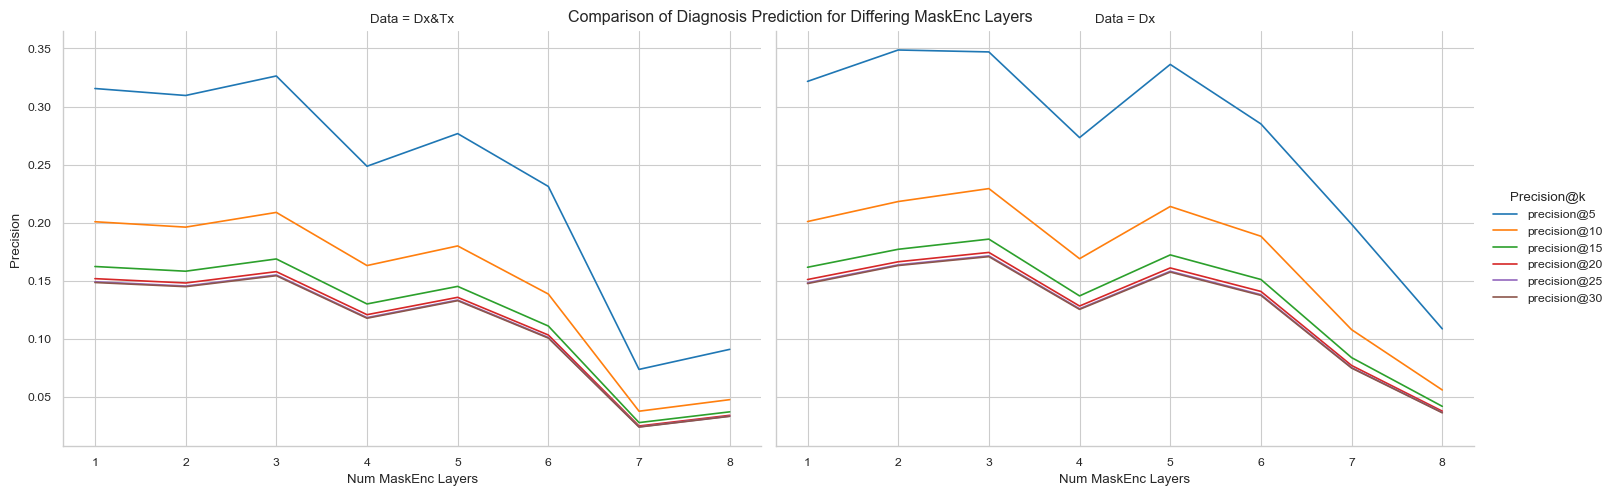

In [100]:
layers_df = perform_df_mapping(pd.read_csv("./results/changing_n_layers.csv"))
layers_df = pd.melt(layers_df,
                    id_vars=['Model', 'Data', 'Num MaskEnc Layers', 'Readm (PR-AUC)'],
                    value_vars=[f"precision@{k}" for k in range(5, 31, 5)],
                    var_name="Precision@k",
                    value_name="Precision")
display(layers_df)

g = sns.relplot(
    data=layers_df,
    x='Num MaskEnc Layers',
    y='Precision',
    col='Data',
    hue='Precision@k',
    kind='line',
    aspect=1.5
)
g.fig.suptitle("Comparison of Diagnosis Prediction for Differing MaskEnc Layers")

plt.savefig(f"./results/changing_n_layers_{CONTEXT}.png", dpi=600)

,Model,Data,Num Attention Heads,Readm (PR-AUC),Precision@k,Precision
0,BiteNet,Dx&Tx,4,0.342929,precision@5,0.345000
1,BiteNet,Dx,4,0.392057,precision@5,0.351178
2,BiteNet,Dx&Tx,8,0.366081,precision@5,0.349867
3,BiteNet,Dx,8,0.400344,precision@5,0.353178
4,BiteNet,Dx&Tx,16,0.356363,precision@5,0.373289
5,BiteNet,Dx,16,0.368805,precision@5,0.325933
6,BiteNet,Dx&Tx,32,0.371979,precision@5,0.340378
7,BiteNet,Dx,32,0.354236,precision@5,0.305911
8,BiteNet,Dx&Tx,4,0.342929,precision@10,0.214510
9,BiteNet,Dx,4,0.392057,precision@10,0.221358


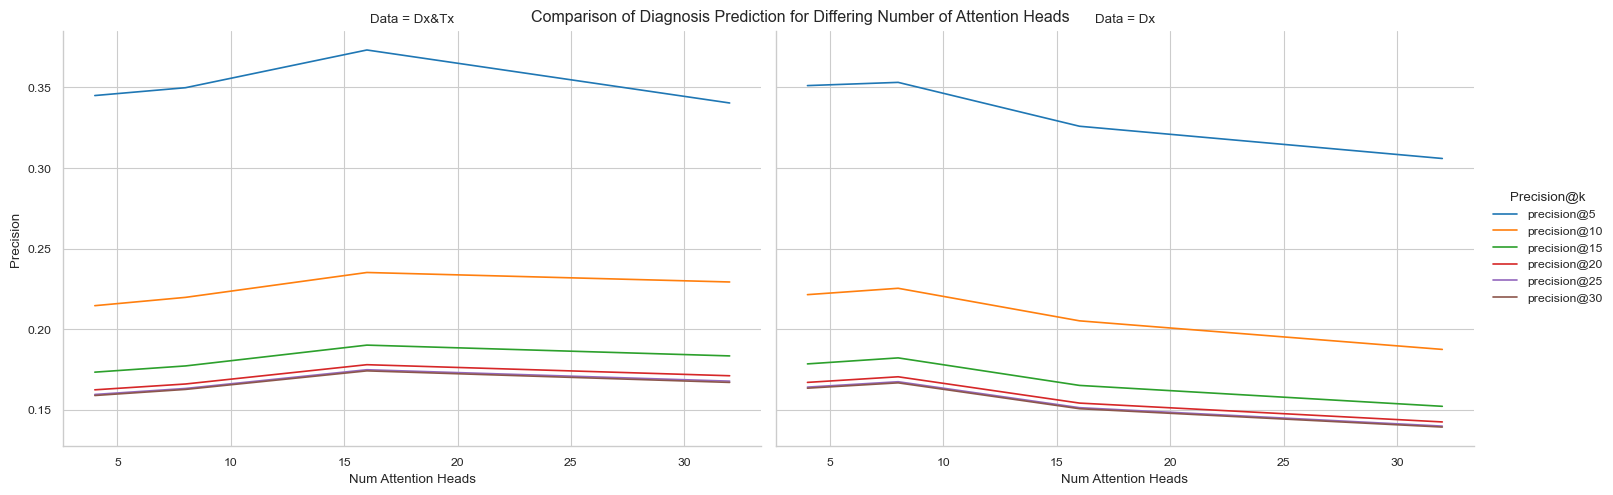

In [101]:
heads_df = perform_df_mapping(pd.read_csv("./results/changing_n_heads.csv"))
heads_df = pd.melt(heads_df,
                    id_vars=['Model', 'Data', 'Num Attention Heads', 'Readm (PR-AUC)'],
                    value_vars=[f"precision@{k}" for k in range(5, 31, 5)],
                    var_name="Precision@k",
                    value_name="Precision")
display(heads_df)

g = sns.relplot(
    data=heads_df,
    x='Num Attention Heads',
    y='Precision',
    col='Data',
    hue='Precision@k',
    kind='line',
    aspect=1.5
)
g.fig.suptitle("Comparison of Diagnosis Prediction for Differing Number of Attention Heads")

plt.savefig(f"./results/changing_n_heads_{CONTEXT}.png", dpi=600)